<a href="https://colab.research.google.com/github/Deepeck05/Artificial_Inteligence_Project/blob/main/Project_spam_Email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
email_data=pd.read_csv("spam_ham_dataset.csv")

In [5]:
email_data.head(20)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [8]:
email_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [8]:
email_data.info()
email_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


,Unnamed: 0,label,text,label_num
count,5171.000000,5171,5171,5171.000000
unique,NaN,2,4993,NaN
top,NaN,ham,Subject: calpine daily gas nomination\r\n>\r\n...,NaN
freq,NaN,3672,20,NaN
mean,2585.000000,NaN,NaN,0.289886
std,1492.883452,NaN,NaN,0.453753
min,0.000000,NaN,NaN,0.000000
25%,1292.500000,NaN,NaN,0.000000
50%,2585.000000,NaN,NaN,0.000000
75%,3877.500000,NaN,NaN,1.000000


In [31]:
email_data.isna().sum()

,0
Unnamed: 0,0
label,0
text,0
label_num,0


In [10]:
email_data.duplicated().sum()

np.int64(0)

In [29]:
email_data[email_data['label']=='spam'][['label','text']].head()

,label,text
3,spam,"Subject: photoshop , windows , office . cheap ..."
7,spam,Subject: looking for medication ? we ` re the ...
10,spam,Subject: vocable % rnd - word asceticism\r\nvc...
11,spam,Subject: report 01405 !\r\nwffur attion brom e...
13,spam,Subject: vic . odin n ^ ow\r\nberne hotbox car...


In [19]:
email_data[email_data['label']=='spam'].count()

,0
Unnamed: 0,1499
label,1499
text,1499
label_num,1499


In [20]:
email_data[email_data['label']=='ham'].count()

,0
Unnamed: 0,3672
label,3672
text,3672
label_num,3672


In [14]:
#feature creation
X = email_data.drop(columns='label_num',axis=1)
Y = email_data['label_num']

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# StandardScaler is not suitable for text data, which is the primary feature here.
# We need to convert the 'text' column into numerical features using a text vectorizer.
vectorizer = TfidfVectorizer()

# Apply TfidfVectorizer to the 'text' column of the training and test sets.
# The 'Unnamed: 0' and 'label' columns are not used as features for text classification.
X_train_vectorized = vectorizer.fit_transform(X_train['text'])
X_test_vectorized = vectorizer.transform(X_test['text'])

# Update X_train and X_test to their vectorized forms.
X_train = X_train_vectorized
X_test = X_test_vectorized

In [21]:
#train the logistic regression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [25]:
prediction=model.predict(X_test)
y_pred=model.predict_proba(X_test)
print(prediction)

[1 1 0 ... 0 1 0]


In [9]:
y_pred

NameError: name 'y_pred' is not defined

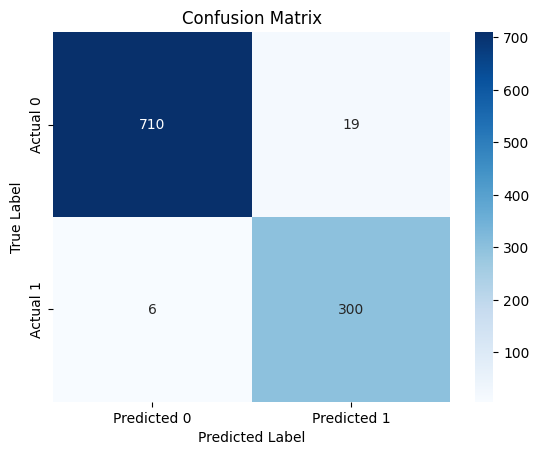

In [35]:
# Visualize the confusion matrix
con_mtrx = confusion_matrix(Y_test, prediction)
sns.heatmap(con_mtrx, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [29]:
accuracy=accuracy_score(Y_test,prediction)
print(accuracy)

0.9758454106280193


In [38]:
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix",con_mtrx)

Accuracy: 0.9758454106280193
Confusion Matrix [[710  19]
 [  6 300]]


CLASSIFICATION RECORD
3.1 Precision

Definition: Out of all emails the model predicted as spam, how many were actually spam?

Formula:
precision = TP / (TP + FP)

TP = true positives

FP = false positives

High precision = model makes fewer mistakes marking normal emails as spam.

3.2 Recall

Definition: Out of all actual spam emails, how many did the model detect?

Formula:
recall = TP / (TP + FN)

High recall = model catches most spam, misses fewer spam emails.

3.3 F1-Score

Definition: The harmonic mean of precision and recall.

Formula:
F1 = 2 * (precision * recall) / (precision + recall)

Why important?

If precision is high but recall is low, or vice-versa, F1 balances both.

Used when both false positives and false negatives matter.

3.4 Support

Definition: The number of actual samples for that class in the test data.

Example:
If there are 150 spam emails in your test set → support for class 1 = 150.

4. Summary Metrics at Bottom

The bottom rows summarize overall model performance.

4.1 Accuracy

Overall percentage of correct predictions.

Formula:
accuracy = (TP + TN) / total samples

4.2 Macro Average

Mean of precision, recall, and F1 treating all classes equally.
It does not care about class size.

Used when classes are imbalanced.

4.3 Weighted Average

Mean of metrics weighted by support (class size).

If ham=965 and spam=150, ham influences the score more.

This is usually the best measure when classes are unbalanced.

In [39]:
classification_report=classification_report(Y_test,prediction)
print(classification_report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       729
           1       0.94      0.98      0.96       306

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035

